# Example of XOR Backpropagation Code

## Imports

In [1]:
%matplotlib inline
import numpy as np
import random as r
import itertools as iter
import matplotlib
import matplotlib.pyplot as pyp

In [2]:
import colorama
from colorama import Fore
#only used to color the answers below; not really necessary

## Creating test variables and flags

In [3]:
plotflag = True
printflag = True
inputs = [(np.array([[0],[0]]),0),(np.array([[0],[1]]),1),(np.array([[1],[0]]),1),(np.array([[1],[1]]),0)]

w1 = np.array([r.random() for a in range(10)]).reshape(5,2)
w2 = np.array([r.random() for a in range(5)]).reshape(1,5)

## Helper Functions

In [4]:
def eudist(x1,x2):
    """Computes the Euclidean distance between two points."""
    return(sum((x1 - x2)**2.0)**0.5)
def sigmoid(zee):
    """Computes the logistic function."""
    return(1.0/(1+np.exp(-1*zee)))

def sigmoidprime(zee):
    """Computes the derivative of the logistic function."""
    return(sigmoid(zee)*(1-sigmoid(zee)))

def cost(y,yhat):
    """Root mean square error "cost function." """
    0.5*(eudist(y,yhat)**2.0)

def costprime(y,yhat):
    """Derivative of RMS cost function."""
    return(yhat - y)

### Functions for the forward and backward passes

In [5]:
def forwardpass (xs,wtlist):
    """Forward Pass of Backpropagation.

    Inputs:
    xs     -- input patterns
    wtlist -- the weight matrix for all layers

    Returns:
    Tuple of weighed inputs and the associated activations
    """
    zees=[]
    ays = [xs]
    for w in wtlist:
        zees.append(np.dot(w,ays[-1]))
        ays.append(sigmoid(zees[-1]))
    return((zees,ays))

def backpass (y,zees,ays,wtlist):
    """Backward Pass of Backpropagation.

    Inputs:
    y      -- output
    zees   -- weighted inputs
    ays    -- activations
    wtlist -- weights

    Returns:
    costgradient
    """
    delta = costprime(y,ays[-1])*sigmoidprime(zees[-1])
    costgrad = [np.dot(delta,ays[-2].T)]
    for l in range(2,3):
        delta = np.dot(wtlist[-l+1].T,delta)*sigmoidprime(zees[-l])
        costgrad.insert(0,np.dot(delta,ays[-l-1].T))
    return(costgrad)

### Loops - one loop version, and repeated version

In [6]:
def fbloop(inp,wts,eta = 0.25):
    """Performs one round of forward and backward passes."""
    zs,heys=forwardpass(inp[0],wts)
    cgs = backpass(inp[1],zs,heys,wts)
    newwts = [wt -eta*cg for wt,cg in zip(wts,cgs)]
    return(newwts)

def bigloop(inputs,startwts,thr = 0.5):
    """bigloop: principal function for peforming backpropagation.

    Inputs:
    inputs   -- a list of input patterns.
    startwts -- the starting weight matrices

    Output:
    printflag provides textual summary of performance.
    plotflag shows a plot of how the error changes during the solving process.
    """
    loopnum = []
    error = []
    inps = iter.cycle(inputs)
    ws = startwts
    for il in range(100000):
        patt = next(inps)
        ws = fbloop(patt,ws)
        if (il%1000 == 0):
            tmpe=0
            for i,o in inputs:
                z,h=forwardpass(i,ws)
                if printflag:
                    tmpans = Fore.GREEN if (h[-1] > thr) == o else Fore.RED
                    print(tmpans + "Loop #{0} gives output {1} with correct {2}".format(il,h[-1],o))
                tmpe = tmpe + abs(h[-1]-o)
            error.append(tmpe[0][0])
            loopnum.append(il)
    if plotflag:
        pyp.plot(loopnum,error)
        pyp.show()

Loop #0 gives output [[0.74271706]] with correct 0
Loop #0 gives output [[0.79546422]] with correct 1
Loop #0 gives output [[0.77774159]] with correct 1
Loop #0 gives output [[0.82073223]] with correct 0
Loop #1000 gives output [[0.48189163]] with correct 0
Loop #1000 gives output [[0.50189397]] with correct 1
Loop #1000 gives output [[0.47655753]] with correct 1
Loop #1000 gives output [[0.49154318]] with correct 0
Loop #2000 gives output [[0.46329697]] with correct 0
Loop #2000 gives output [[0.51311232]] with correct 1
Loop #2000 gives output [[0.48255765]] with correct 1
Loop #2000 gives output [[0.50679294]] with correct 0
Loop #3000 gives output [[0.41283452]] with correct 0
Loop #3000 gives output [[0.55142322]] with correct 1
Loop #3000 gives output [[0.50544721]] with correct 1
Loop #3000 gives output [[0.52312861]] with correct 0
Loop #4000 gives output [[0.34857189]] with correct 0
Loop #4000 gives output [[0.5984914]] with correct 1
Loop #4000 gives output [[0.54291464]] wi

Loop #35000 gives output [[0.05209689]] with correct 0
Loop #35000 gives output [[0.95693506]] with correct 1
Loop #35000 gives output [[0.95591586]] with correct 1
Loop #35000 gives output [[0.03714742]] with correct 0
Loop #36000 gives output [[0.05113917]] with correct 0
Loop #36000 gives output [[0.95770921]] with correct 1
Loop #36000 gives output [[0.9567258]] with correct 1
Loop #36000 gives output [[0.03647129]] with correct 0
Loop #37000 gives output [[0.05022739]] with correct 0
Loop #37000 gives output [[0.95844455]] with correct 1
Loop #37000 gives output [[0.95749492]] with correct 1
Loop #37000 gives output [[0.03583111]] with correct 0
Loop #38000 gives output [[0.04935803]] with correct 0
Loop #38000 gives output [[0.95914421]] with correct 1
Loop #38000 gives output [[0.95822651]] with correct 1
Loop #38000 gives output [[0.03522383]] with correct 0
Loop #39000 gives output [[0.04852795]] with correct 0
Loop #39000 gives output [[0.959811]] with correct 1
Loop #39000 g

Loop #70000 gives output [[0.03338945]] with correct 0
Loop #70000 gives output [[0.97182815]] with correct 1
Loop #70000 gives output [[0.97141999]] with correct 1
Loop #70000 gives output [[0.02448289]] with correct 0
Loop #71000 gives output [[0.03309175]] with correct 0
Loop #71000 gives output [[0.97206338]] with correct 1
Loop #71000 gives output [[0.97166276]] with correct 1
Loop #71000 gives output [[0.02428736]] with correct 0
Loop #72000 gives output [[0.03280087]] with correct 0
Loop #72000 gives output [[0.97229326]] with correct 1
Loop #72000 gives output [[0.97189989]] with correct 1
Loop #72000 gives output [[0.02409636]] with correct 0
Loop #73000 gives output [[0.03251656]] with correct 0
Loop #73000 gives output [[0.97251798]] with correct 1
Loop #73000 gives output [[0.97213162]] with correct 1
Loop #73000 gives output [[0.0239097]] with correct 0
Loop #74000 gives output [[0.03223858]] with correct 0
Loop #74000 gives output [[0.97273773]] with correct 1
Loop #74000

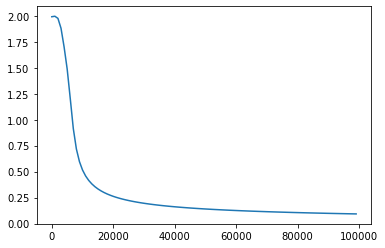

In [7]:
#Demo of the code with both flags
bigloop(inputs, [w1,w2])